In [1]:
library(hdf5r)
library(Seurat)
library(purrr)
library(dplyr)
library(stringr)
library(harmony)
library(DoubletFinder)
library(ggplot2)
library(ggpubr)
library(plyr)
library(pheatmap)

Attaching SeuratObject


Attaching package: ‘purrr’


The following object is masked from ‘package:hdf5r’:

    flatten_df



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Rcpp

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following object is masked from ‘package:ggpubr’:

    mutate


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    comp

In [2]:
mph = readRDS('~/HPV/res/public_rna/seurat_rds/annotated/mph.rds')

In [3]:
marker_genes = c('VEGFA','SPP1','TREM2','MRC1','ARG1','FOLR2','CCL20','C1QC','LYVE1','SLC2A1','CD36','SIGLEC1','CXCL9','HLA-DRA','CXCL9','TNF','S100A8','FCN1')

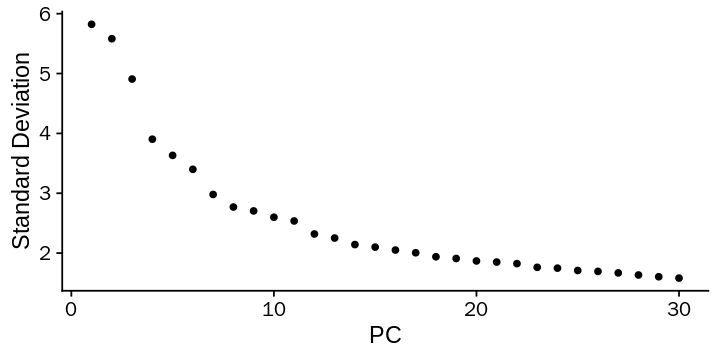

In [4]:
temp = mph
mph = CreateSeuratObject(counts = mph@assays$RNA@counts, project = "mph") %>% 
    NormalizeData(verbose = FALSE) %>%
    FindVariableFeatures(selection.method = "vst", nfeatures = 1000)
VariableFeatures(mph) = unique(c(marker_genes, mph@assays$RNA@var.features))
mph = ScaleData(mph, verbose = FALSE) %>% 
    RunPCA(npcs = 30, verbose = FALSE)
options(repr.plot.width = 6, repr.plot.height = 3)
ElbowPlot(mph,ndims = 30)

In [5]:
mph@meta.data = temp@meta.data
mph = RunHarmony(mph, 'Patient', verbose = FALSE) %>%    
    RunUMAP(reduction = "harmony", dims = 1:15, verbose = FALSE) %>%
    FindNeighbors(reduction = "harmony", dims = 1:15, verbose = FALSE) %>%
    FindClusters(resolution = 0.6, verbose = FALSE)

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”
Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


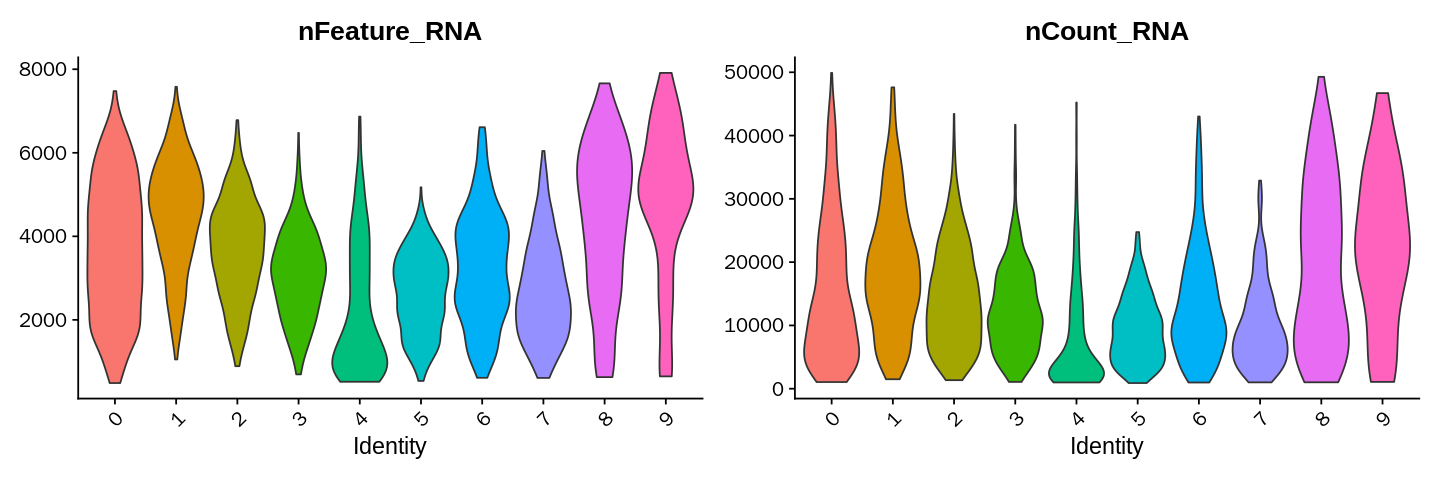

In [6]:
options(repr.plot.width = 12, repr.plot.height = 4)
VlnPlot(mph,features = c("nFeature_RNA", "nCount_RNA"),pt.size = 0)

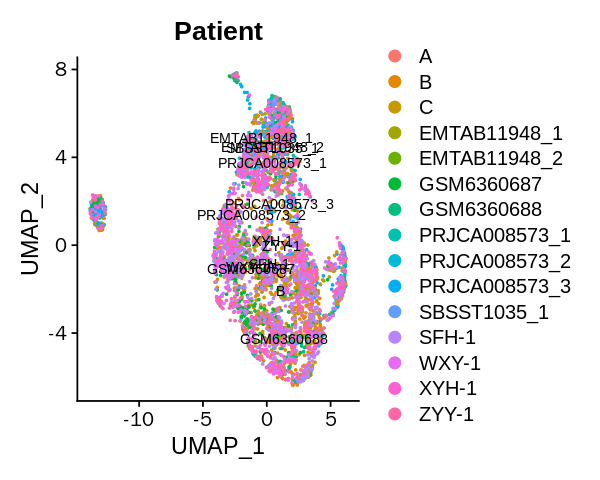

In [7]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(mph, group.by = 'Patient',label = TRUE,label.size = 3)

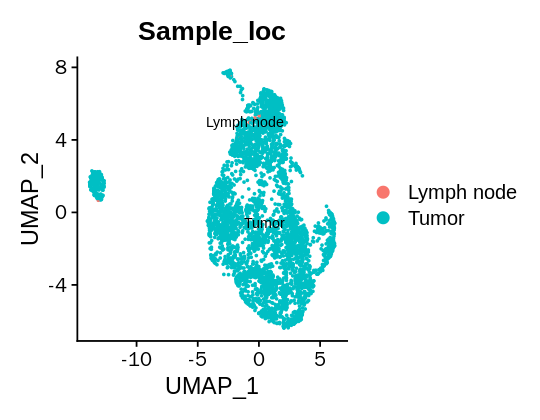

In [8]:
options(repr.plot.width = 4.5, repr.plot.height = 3.5)
DimPlot(mph, group.by = 'Sample_loc',label = TRUE,label.size = 3)

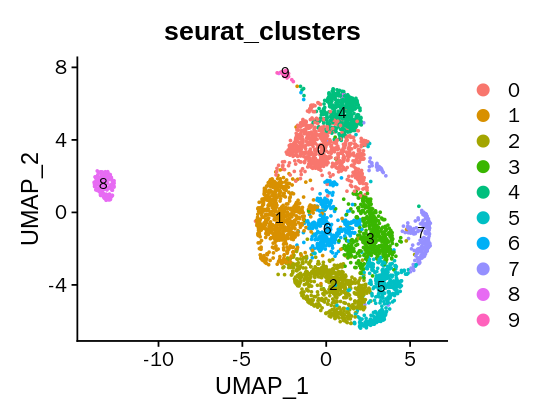

In [9]:
options(repr.plot.width = 4.5, repr.plot.height = 3.5)
DimPlot(mph, group.by = 'seurat_clusters',label = TRUE,label.size = 3)

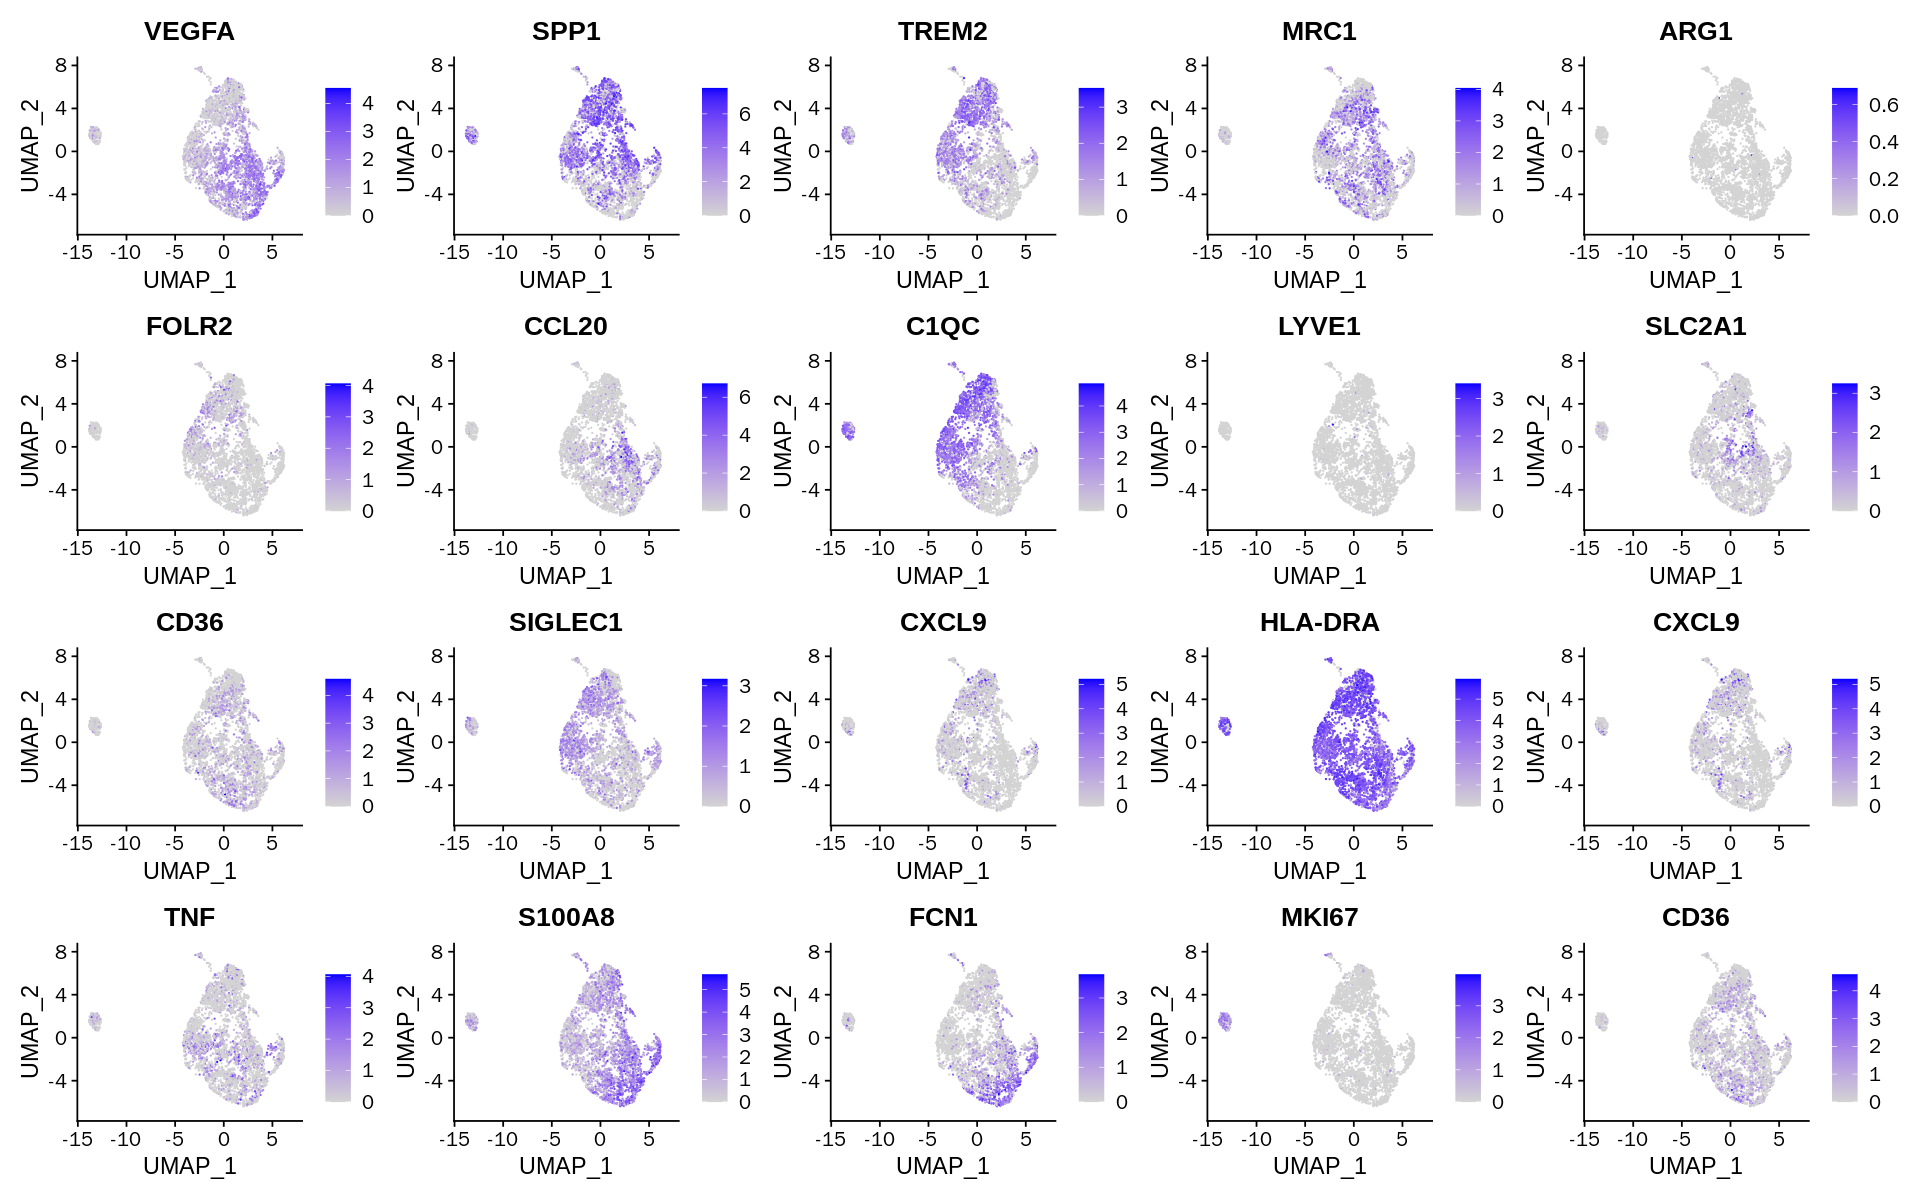

In [10]:
options(repr.plot.width = 16, repr.plot.height = 10)
FeaturePlot(mph,features = c(marker_genes,'MKI67','CD36'),ncol = 5,pt.size = 0.001)

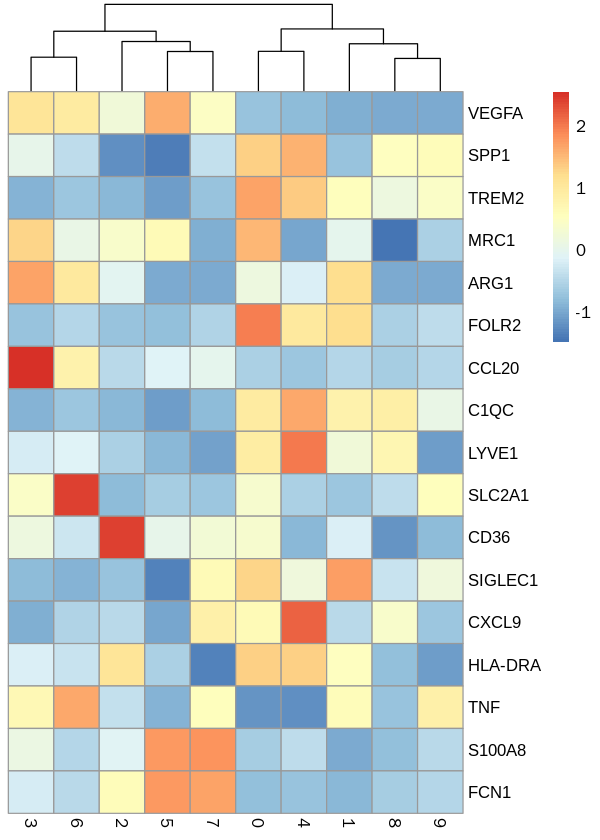

In [11]:
gene_cell_exp <- AverageExpression(mph,
                                   features = c(marker_genes),
                                   group.by = 'seurat_clusters',
                                   slot = 'data') 
gene_cell_exp <- as.data.frame(gene_cell_exp$RNA)
marker_exp <- t(scale(t(gene_cell_exp),scale = T,center = T))
options(repr.plot.width = 5, repr.plot.height = 7)
pheatmap(marker_exp,cluster_rows = FALSE)

In [12]:
mph$minor = 'mph'
mph$minor[mph$seurat_clusters %in% c('4')] = 'Mph_CXCL9'
mph$minor[mph$seurat_clusters %in% c('0')] = 'Mph_FOLR2'
mph$minor[mph$seurat_clusters %in% c('1')] = 'Mph_SIGLEC1'
mph$minor[mph$seurat_clusters %in% c('6')] = 'Mph_SLC2A1'
mph$minor[mph$seurat_clusters %in% c('3')] = 'Mph_CCL20'
mph$minor[mph$seurat_clusters %in% c('2')] = 'Mph_CD36'
mph$minor[mph$seurat_clusters %in% c('5','7')] = 'Mph_FCN1'
mph$minor[mph$seurat_clusters %in% c('8')] = 'Mph_MKI67'
mph$minor[mph$seurat_clusters %in% c('9')] = 'others'

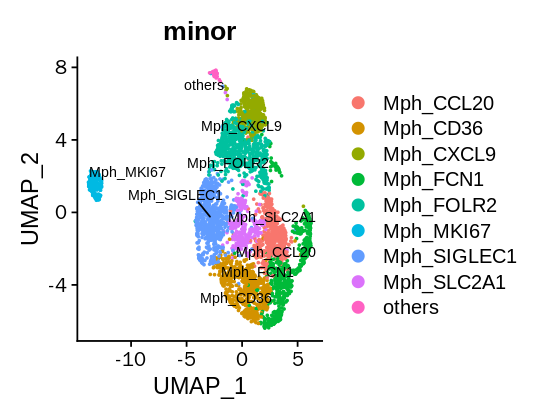

In [13]:
options(repr.plot.width = 4.5, repr.plot.height = 3.5)
DimPlot(mph, group.by = 'minor',label = TRUE,label.size = 3, repel = TRUE)

In [14]:
saveRDS(mph, file = '~/HPV/res/public_rna/seurat_rds/mph.rds')

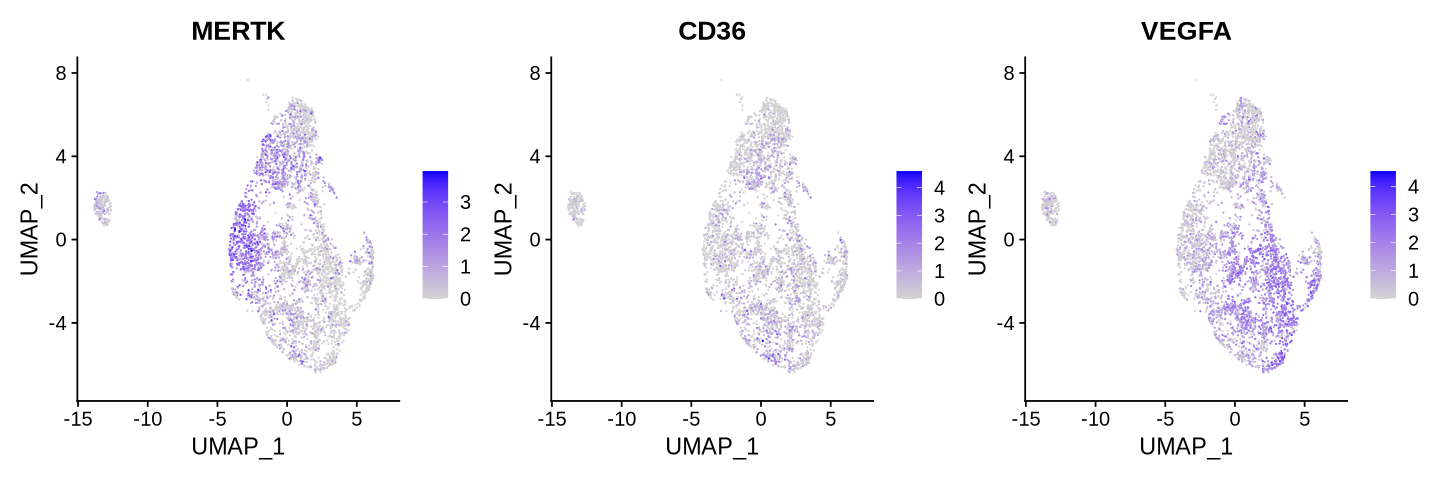

In [13]:
options(repr.plot.width = 12, repr.plot.height = 4)
FeaturePlot(mph,features = c('MERTK','CD36','VEGFA'), ncol = 3,pt.size = 0.001)

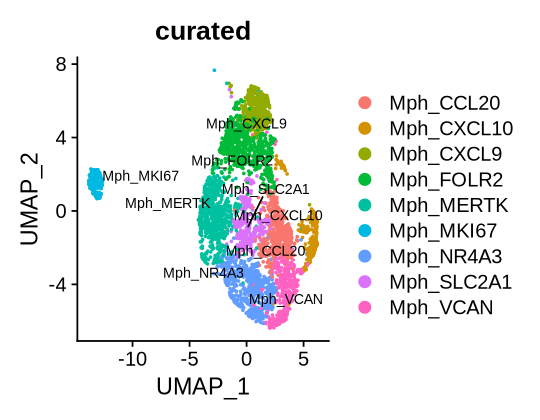

In [11]:
options(repr.plot.width = 4.5, repr.plot.height = 3.5)
DimPlot(mph, group.by = 'curated',label = TRUE,label.size = 3, repel = TRUE)